# Pair Programming Correlación y covarianza

In [6]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
import researchpy as rp
from scipy.stats import levene


plt.rcParams["figure.figsize"] = (20,15) 

In [2]:
df= pd.read_csv('../files/desarrollados.csv', index_col=0)
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.00000,93.0,74,...,93.0,NaN,93.0,0.1,56554.3876,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.36305,91.0,340,...,92.0,9.42,92.0,0.1,62214.6912,2346694.0,0.6,0.6,0.936,20.4


## 1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

Covarianza indica si ambas ariables varian en la misma dirección. Si esta es positiva aumenta el valor de una variable y aumenta el valor de la otra, mientras que si es negativa disminuye el valor de la una y el de la otra.
Correlación nos muestra si exite relación y el grado de la misma, y nos indica con qué fuerza están relacionadas, a diferencia de la covarianza que sólo nos indica la dirección.

## 2. Calculad la covarianza y la correlación de nuestro dataset. 
No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [3]:
df.cov()

/tmp/ipykernel_1999/1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,21.291585,6.035127e+00,-3.226712e+01,-8.737769e-01,-1.543945,5.273404e+02,1.183579e+01,-1.027565e+03,7.777886e+00,-9.657534e-01,4.492172e+00,1.701399e+00,7.958904e+00,0.0,1.235730e+04,-5.855958e+05,-3.011742e-01,-0.341389,0.094003,2.108963e+00
life_expectancy,6.035127,1.545230e+01,-9.137093e+01,-9.871946e-01,-3.132355,5.266186e+03,-7.071731e+00,3.758008e+02,-2.971851e+00,-1.014889e+00,7.775146e-01,8.424586e-01,-9.657060e-01,0.0,3.246151e+04,4.793524e+06,-1.748977e+00,-1.944175,0.154652,2.822447e+00
adult_mortality,-32.267123,-9.137093e+01,2.292263e+03,-1.056251e+01,18.264841,-3.736764e+04,1.249521e+02,-4.418795e+03,-8.432233e+00,-1.253131e+01,1.166448e+01,-2.242543e+01,6.226471e+00,0.0,-2.741513e+05,-2.916145e+07,1.708441e+01,19.075666,-1.227908,-2.074754e+01
infant_deaths,-0.873777,-9.871946e-01,-1.056251e+01,2.102932e+01,-0.987799,-2.644995e+03,-8.149203e+00,5.970558e+02,3.746011e+00,2.463587e+01,-9.303896e+00,6.391507e+00,1.987142e+00,0.0,-2.818853e+03,6.544197e+06,-3.713070e-01,-0.454129,-0.008620,-1.684591e-01
alcohol,-1.543945,-3.132355e+00,1.826484e+01,-9.877991e-01,7.649970,-1.301066e+02,-1.692772e+00,-4.159573e+02,6.853731e+00,-1.148477e+00,-6.104387e-01,-1.718009e-01,1.115825e-01,0.0,-3.080407e+03,9.631557e+05,6.218598e-03,0.054117,-0.031154,-1.567801e-02
percentage_expenditure,527.340375,5.266186e+03,-3.736764e+04,-2.644995e+03,-130.106585,1.462451e+07,-4.887725e+03,4.827817e+05,-1.186329e+03,-3.154299e+03,1.027596e+01,4.021027e+02,-2.171402e+03,0.0,8.229939e+07,1.000404e+09,-8.410157e+02,-921.803131,96.013697,1.348194e+03
hepatitis_b,11.835786,-7.071731e+00,1.249521e+02,-8.149203e+00,-1.692772,-4.887725e+03,4.198089e+02,1.188049e+03,2.693761e+01,-8.833848e+00,4.007338e+01,-2.944997e+00,5.588880e+01,0.0,-1.742636e+04,-2.463093e+07,3.333478e+00,3.629945,-0.201402,-8.635919e+00
measles,-1027.564579,3.758008e+02,-4.418795e+03,5.970558e+02,-415.957336,4.827817e+05,1.188049e+03,6.396269e+06,-4.447651e+03,8.767095e+02,-2.205347e+02,-1.379923e+02,2.794493e+02,0.0,2.088793e+06,2.723555e+09,8.333706e+01,37.037006,-2.414369,-3.664739e+02
bmi,7.777886,-2.971851e+00,-8.432233e+00,3.746011e+00,6.853731,-1.186329e+03,2.693761e+01,-4.447651e+03,2.957309e+02,4.062190e+00,1.095896e+01,7.766613e+00,1.556428e+01,0.0,-1.526554e+04,2.616563e+07,-1.701353e+00,-1.462159,-0.010744,3.578152e+00
under-five_deaths,-0.965753,-1.014889e+00,-1.253131e+01,2.463587e+01,-1.148477,-3.154299e+03,-8.833848e+00,8.767095e+02,4.062190e+00,2.898752e+01,-1.087197e+01,7.448441e+00,2.370306e+00,0.0,-4.021601e+03,7.265017e+06,-4.369702e-01,-0.537617,-0.008834,-1.838562e-01


In [4]:
df.corr()

/tmp/ipykernel_1999/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,1.000000,0.332725,-0.146058,-0.041294,-0.127807,0.029885,0.126006,-0.088053,0.098019,-0.038874,0.090278,0.131815,0.137645,NaN,0.117078,-0.008576,-0.086270,-0.089236,0.385483,0.258663
life_expectancy,0.332725,1.000000,-0.485489,-0.054764,-0.287769,0.350315,-0.086190,0.037801,-0.043962,-0.047953,0.018342,0.071593,-0.019605,NaN,0.353451,0.079620,-0.588078,-0.596530,0.724027,0.395210
adult_mortality,-0.146058,-0.485489,1.000000,-0.048109,0.136402,-0.204091,0.118128,-0.036493,-0.010241,-0.048614,0.022593,-0.154660,0.010378,NaN,-0.249611,-0.039850,0.471645,0.480553,-0.481322,-0.243242
infant_deaths,-0.041294,-0.054764,-0.048109,1.000000,-0.077568,-0.150824,-0.072022,0.051480,0.047502,0.997815,-0.188141,0.463426,0.034580,NaN,-0.122182,0.429268,-0.107021,-0.119443,-0.163428,-0.095529
alcohol,-0.127807,-0.287769,0.136402,-0.077568,1.000000,-0.012136,-0.028847,-0.057898,0.144934,-0.076675,-0.019941,-0.020960,0.003135,NaN,-0.046389,0.026803,0.002944,0.023358,-0.208113,-0.003140
percentage_expenditure,0.029885,0.350315,-0.204091,-0.150824,-0.012136,1.000000,-0.073480,0.049917,-0.018039,-0.153199,0.000249,0.034695,-0.045312,NaN,0.913347,0.016838,-0.290677,-0.290731,0.464445,0.195054
hepatitis_b,0.126006,-0.086190,0.118128,-0.072022,-0.028847,-0.073480,1.000000,0.035521,0.071070,-0.066566,0.212954,-0.044763,0.243629,NaN,-0.039236,-0.069748,0.194788,0.194137,-0.189414,-0.226139
measles,-0.088053,0.037801,-0.036493,0.051480,-0.057898,0.049917,0.035521,1.000000,-0.102263,0.064385,-0.008086,-0.017730,0.008818,NaN,0.033871,0.065856,0.043553,0.017663,-0.017233,-0.078236
bmi,0.098019,-0.043962,-0.010241,0.047502,0.144934,-0.018039,0.071070,-0.102263,1.000000,0.043874,0.059095,0.152072,0.072226,NaN,-0.039131,0.107969,-0.130765,-0.102551,-0.012023,0.119754
under-five_deaths,-0.038874,-0.047953,-0.048614,0.997815,-0.076675,-0.153199,-0.066566,0.064385,0.043874,1.000000,-0.187255,0.459187,0.035133,NaN,-0.141150,0.386324,-0.107274,-0.120437,-0.135669,-0.084453


## 3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

/tmp/ipykernel_1999/3366460188.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.


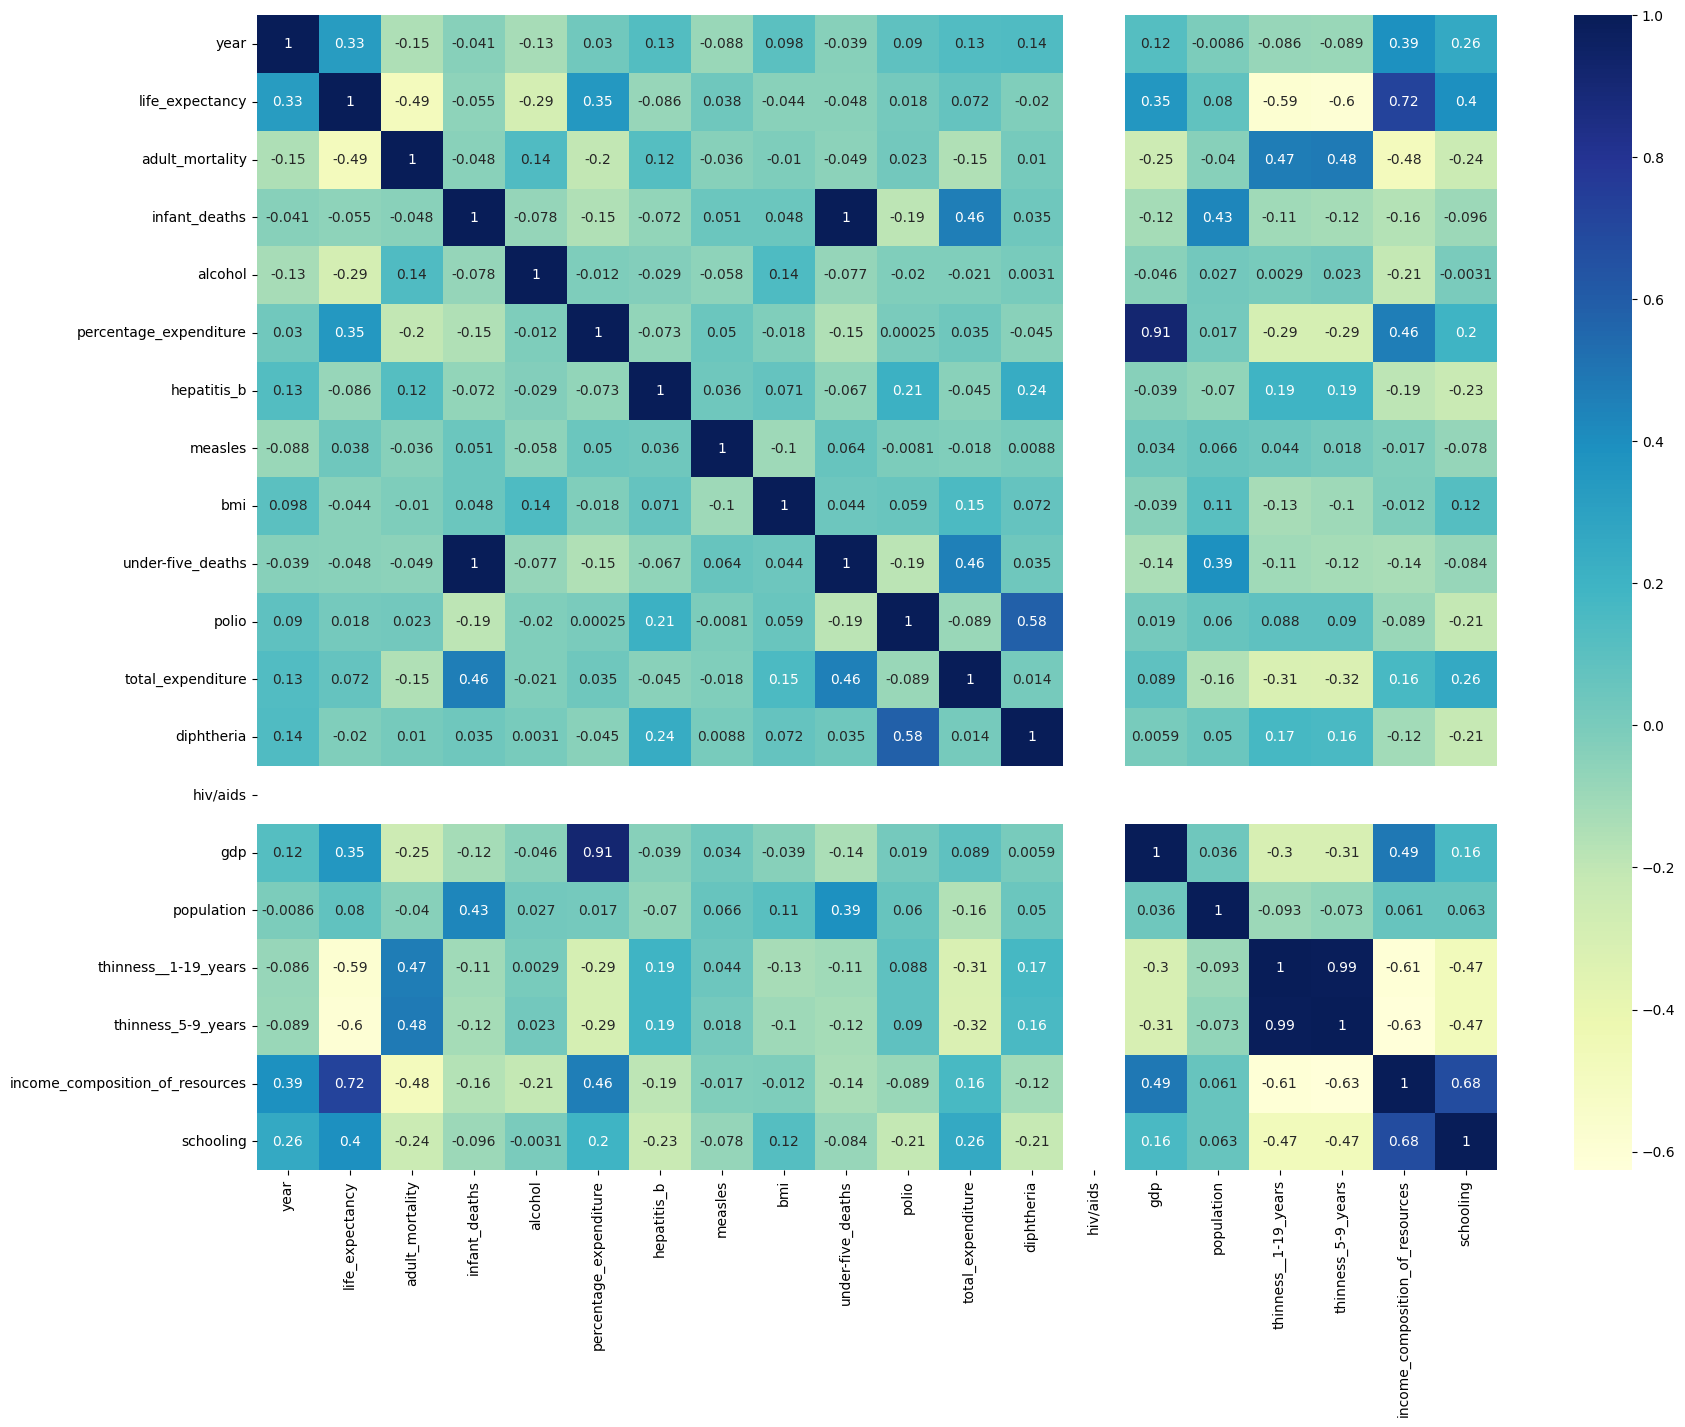

In [7]:
sns.heatmap(df.corr(), # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "YlGnBu", # para especoficar el color del mapa
           annot = True); # para sacar el valor de la correlación

In [11]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

/tmp/ipykernel_1999/1424773859.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
/tmp/ipykernel_1999/1424773859.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


In [14]:
import os

In [15]:
os.getcwd()

'/mnt/d/Ximena/Adalab/Módulo 3/DA-promo-c-modulo-3-sprint-1-Ximena-Anahi/1. Regresion Lineal'

/tmp/ipykernel_1999/2239814272.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


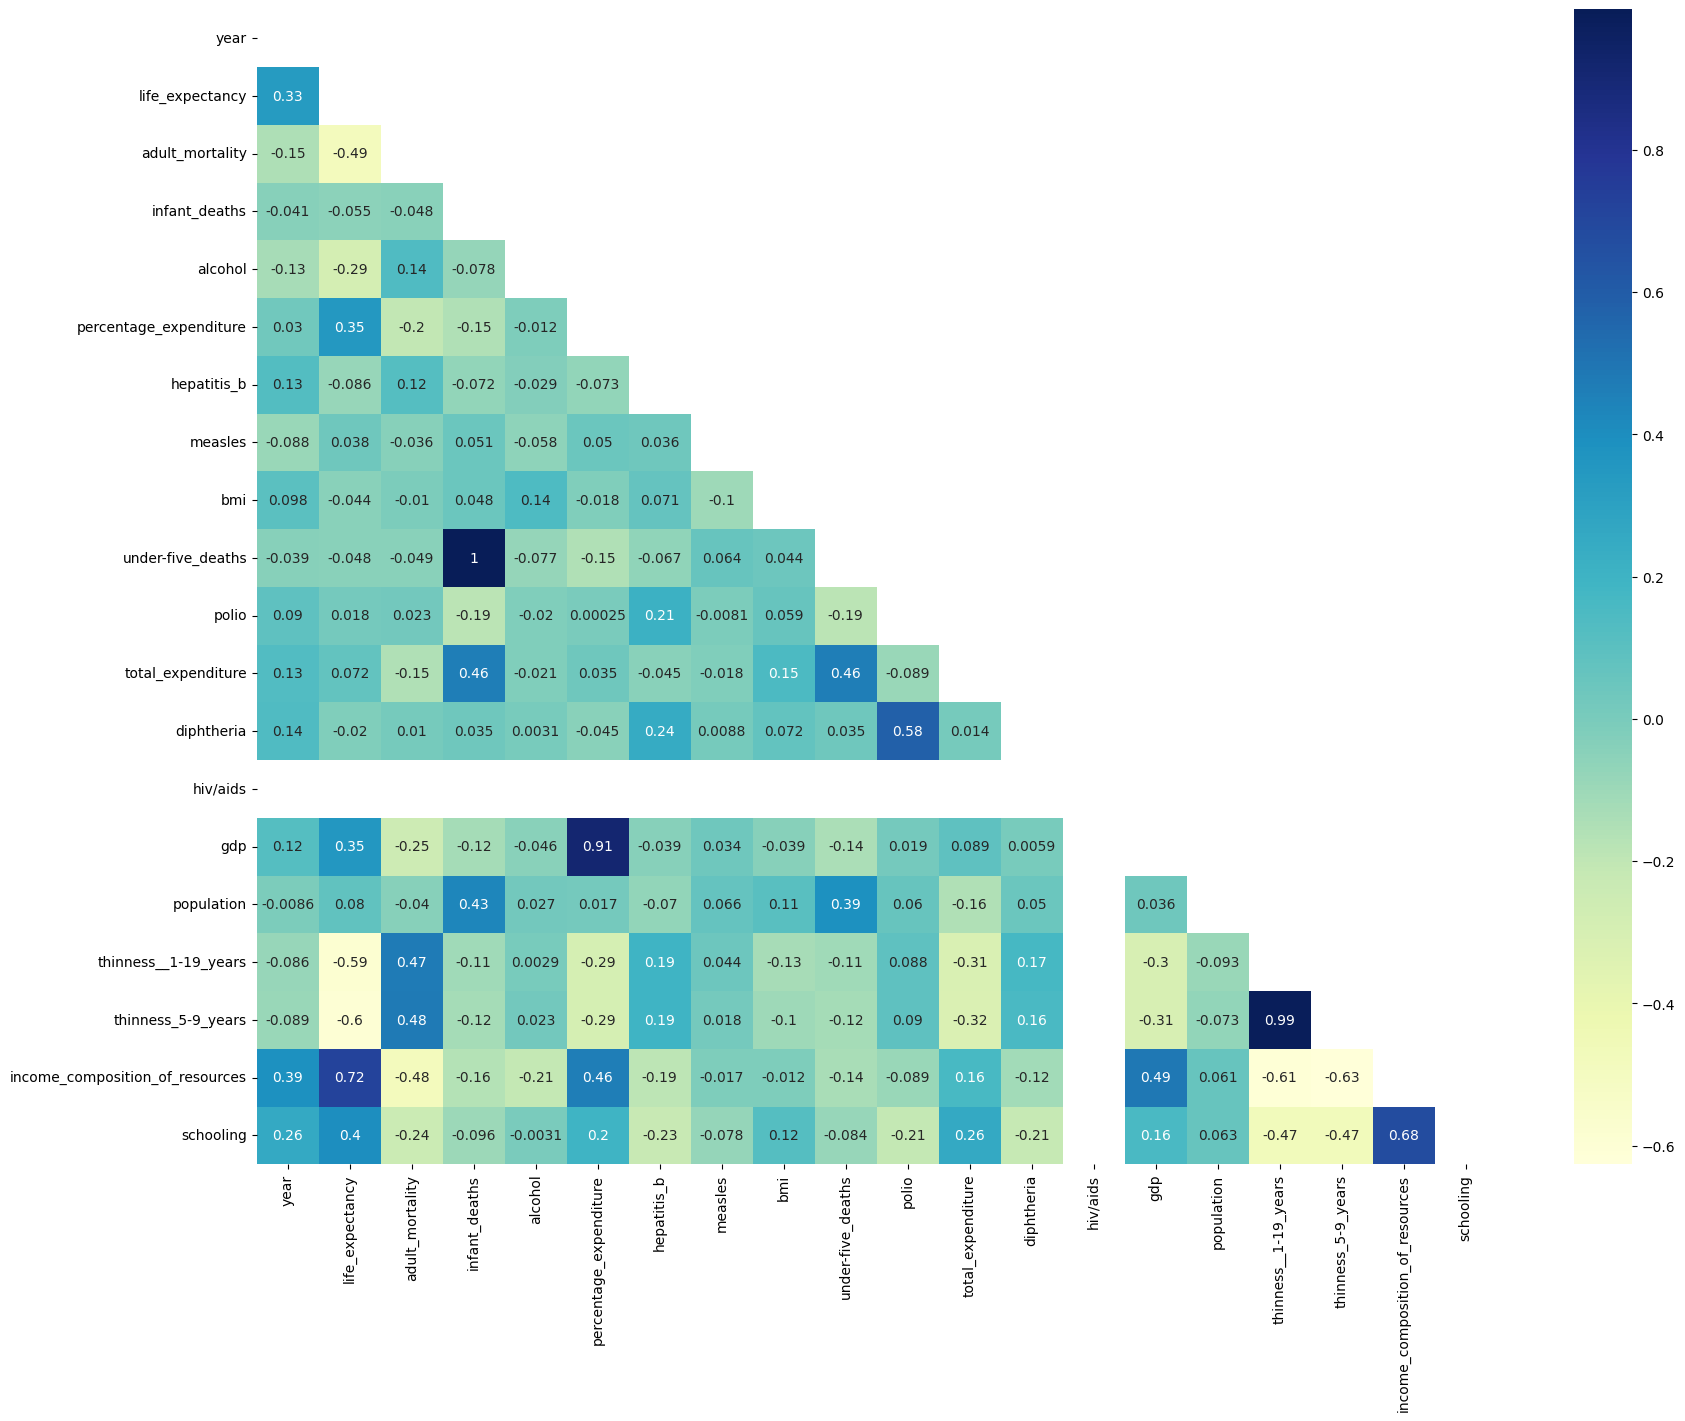

In [16]:
sns.heatmap(df.corr(),
            cmap = "YlGnBu", 
            mask = mask, # incorporamos la máscara en nuestro plot
           annot = True); 
plt.savefig("graficas/heatmap_completo.png")

Variables redundantes:

under five deaths e infant death, nos quedamos con infant deatc


In [8]:
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.00000,93.0,74,...,93.0,NaN,93.0,0.1,56554.3876,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.36305,91.0,340,...,92.0,9.42,92.0,0.1,62214.6912,2346694.0,0.6,0.6,0.936,20.4


In [9]:
df["hiv/aids"].value_counts()

0.1    512
Name: hiv/aids, dtype: int64

## 4. Guardad la gráfica del heatmap.